In [1]:
import mysql.connector as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import db_info

# Análise Exploratória de Dados (EDA) da tabelas.

### Faço uma análise de cada tabela para entender melhor como são constituídas e se algum campo precisa de tratamento.

## Análise da Tabela de Produtos

In [2]:
db_connection = sql.connect(host=db_info.HOST, database=db_info.DATABASE, user=db_info.USER, password=db_info.PASS)
produtos = pd.read_sql("SELECT * FROM produtos", con=db_connection)
db_connection.close()

In [3]:
produtos.head()

,id_produto,categoria_produto,preco,custos
0,1,agro_industria_e_comercio,15500.0,4650.0
1,2,alimentos,5800.0,1740.0
2,3,alimentos_e_bebidas,11900.0,3570.0
3,4,artes,8400.0,2520.0
4,5,artes_e_artesanato,9900.0,2970.0


## Vejo que não há valores faltantes na tabela

In [4]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_produto         68 non-null     int64  
 1   categoria_produto  68 non-null     object 
 2   preco              68 non-null     float64
 3   custos             68 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.2+ KB


## Olhando o resumo dos campo 'preco' e 'custo' não há nada que chame a atenção.

Nenhum produto tem o valor 0, ou um valor extremamente alto.

In [5]:
produtos.describe()

,id_produto,preco,custos
count,68.00000,68.000000,68.000000
mean,34.50000,12326.470588,3697.941176
std,19.77372,4587.511199,1376.253360
min,1.00000,5200.000000,1560.000000
25%,17.75000,8400.000000,2520.000000
50%,34.50000,11950.000000,3585.000000
75%,51.25000,16875.000000,5062.500000
max,68.00000,19800.000000,5940.000000


## Olhando o comportamento dos campos 'preco' e 'custo' eles parecem apresentar valores condizentes.

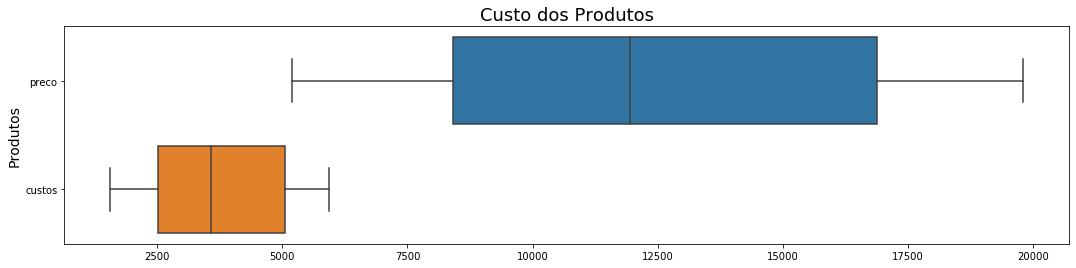

In [6]:
ax = sns.boxplot(data = produtos[['preco','custos']], orient = 'h')
ax.figure.set_size_inches(18, 4)
ax.set_title("Custo dos Produtos", fontsize = 18)
ax.set_ylabel("Produtos", fontsize = 14)
plt.show()